# Project 1 - Mercedes-Benz Greener Manufacturing
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

#### Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost

**We are required to reduce the time that cars spend on the test bench.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print("Shape of train data is {}".format(train.shape))
print("Shape of test data is {}".format(test.shape))

Shape of train data is (4209, 378)
Shape of test data is (4209, 377)


In [4]:
for i in train.columns:
    if i not in test.columns:
        print("Our traget variable is : {} ".format(i))

Our traget variable is : y 


### Lets explore type our train dataset.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


There are total 378 features out of which below are diferent types of data we are with:
* float64 : 1
* int64 : 369
* object : 8

In [6]:
print("Below are the total columns we are provided with :")
print(list(train.columns))

Below are the total columns we are provided with :
['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', '

In [7]:
print('Number of unique values in ID column to identify what it means :',train.ID.nunique())

Number of unique values in ID column to identify what it means : 4209


Interpretation : *From above we can clearly interpret that ID column is nothing just a unique ID provided to different columns. So we can drop that for our further analysis.*

In [8]:
train.drop('ID',axis=1,inplace=True)

### If for any column(s), the variance is equal to zero, then we need to remove those variable(s).

In [9]:
var_df=pd.DataFrame(np.var(train,0),columns=['variance'])
var_df.sort_values(by='variance').head(15)

,variance
X268,0.000000
X297,0.000000
X290,0.000000
X289,0.000000
X330,0.000000
X347,0.000000
X235,0.000000
X293,0.000000
X233,0.000000
X107,0.000000


In [10]:
print('Below are columns with variance 0.')
col=list((var_df[var_df['variance']==0]).index)
print(col)

Below are columns with variance 0.
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [11]:
for i in col:
    print(i, train[i].dtype)

X11 int64
X93 int64
X107 int64
X233 int64
X235 int64
X268 int64
X289 int64
X290 int64
X293 int64
X297 int64
X330 int64
X347 int64


Interpretation : *Above variance 0 shows that all the values in column is same and there is no variablity in data.* Lets drop above 12 columns with variance 0.

In [12]:
train.drop(col,axis=1,inplace=True)

In [13]:
train.shape

(4209, 365)

### Check for null and unique values for test and train sets.

**Lets check out if there are any Missing value in our train dataset**

In [14]:
print("Number of missing values : \n {}".format(train.isna().sum().value_counts()))

Number of missing values : 
 0    365
dtype: int64


Interpretation : *From above we can interpret that there is no missing observation is our train datset.*

### Lets explore different variable type and perform label encoding.

In [15]:
object_col=[]
for i in train.columns:
    a= train[i].dtype
    if a =='object':
        object_col.append(i)
print(object_col)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [16]:
for i in object_col:
    print(i, train[i].nunique())

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12
X8 25


In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_col:
    train[i]=LE.fit_transform(train[i])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, y to X385
dtypes: float64(1), int64(364)
memory usage: 11.7 MB


In [21]:
train1=pd.DataFrame(train,columns=train.columns)
train1

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,8,20,16,2,3,0,3,16,0,...,1,0,0,0,0,0,0,0,0,0
4205,108.77,31,16,40,3,3,0,7,7,0,...,0,1,0,0,0,0,0,0,0,0
4206,109.22,8,23,38,0,3,0,6,4,0,...,0,0,1,0,0,0,0,0,0,0
4207,87.48,9,19,25,5,3,0,11,20,0,...,0,0,0,0,0,0,0,0,0,0


### **Defining dependent(Y) and independent(X) variables.**
* independent(X) : X_data
* dependent(Y) : Y_data

In [22]:
X_data=train1.drop('y',axis=1)
Y_data=train1['y']

In [23]:
X_data.shape

(4209, 364)

In [24]:
from sklearn.decomposition import PCA
PCA_=PCA(random_state=0)
Principal_comp=PCA_.fit(X_data)

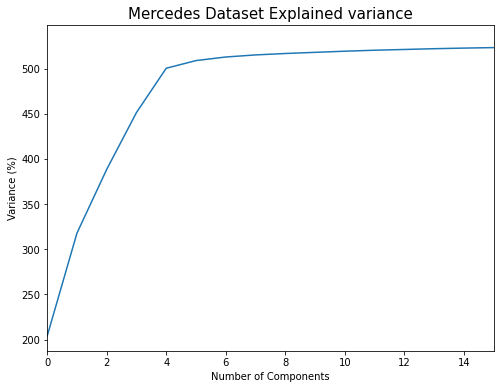

In [25]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(PCA_.explained_variance_))
plt.title("Mercedes Dataset Explained variance",fontdict = {'fontsize':15})
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.xlim(0,15)
plt.show()

In [26]:
PCA_=PCA(n_components=5)
Principal_data=PCA_.fit_transform(X_data)
PCA_.explained_variance_ratio_.sum()

0.9401733147573702

In [27]:
PCA_.explained_variance_ratio_*100

array([38.33478209, 21.38803259, 13.2618659 , 11.82664248,  9.20600842])

Interpretation : *The first component is the most important one, followed by the second, then the third, and so on. In our case 5 components expains 94.01% variance with 5.99% loss of Information.*

In [28]:
Principal_data=pd.DataFrame(Principal_data)

### Our next aim is model fitting. We will fit XGboost regressor algorithm here.

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.25,random_state=50)

In [30]:
X_test.shape

(1053, 364)

To find out best parameters for fitting lets apply GridSearchCV

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

XGboost=XGBRegressor()
xgbparams={'max_depth': [3,5,10,15], 'learning_rate' : [0.1], 'n_estimators' : [50,100,200,300],'random_state' :[0]}
grid=zip([XGboost],[xgbparams])
best_model=None
for model,param in grid:
    temp=GridSearchCV(model,param_grid=param,cv=3,n_jobs=1)
    temp.fit(X_train,Y_train)
    if best_model is None:
        best_model=temp
    else:
        if temp.best_score_ > best_model.best_score_:
            best_model = temp
print ("Best CV Score",best_model.best_score_)
print ("Model Parameters",best_model.best_params_)
print("Best Estimator",best_model.best_estimator_)

Best CV Score 0.5564287019742021
Model Parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0}
Best Estimator XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)


In [32]:
model=best_model.best_estimator_
model.fit(X_train,Y_train)
pred=model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(Y_test,pred)

0.5847471533820565

In [34]:
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.5858725179405241
0.5847471533820565


In [35]:
X_data_copy=X_data.copy()

### Lets apply cleaning on test data and then find prediction for that.

In [36]:
test.drop('ID',axis=1,inplace=True)
test.drop(col,axis=1,inplace=True)
test.isna().sum().value_counts()

0    364
dtype: int64

In [37]:
for i in object_col:
    test[i]=LE.fit_transform(test[i])

In [38]:
test1=pd.DataFrame(test,columns=test.columns)

In [39]:
model.predict(test1)

array([ 77.21249 ,  94.13634 ,  77.83281 , ...,  93.775505, 111.64696 ,
        94.01045 ], dtype=float32)

#### Here we will try alternative dimension reduction techniques if any works to increase model accuracy

In [40]:
from sklearn.decomposition import FastICA
ICA=FastICA(n_components=5,random_state=0)
New_df=ICA.fit_transform(X_data_copy)
New_df=pd.DataFrame(New_df)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(New_df,Y_data,test_size=0.25,random_state=50)

In [42]:
model_2=best_model.best_estimator_
model_2.fit(X_train,Y_train)
pred=model_2.predict(X_test)

In [43]:
r2_score(Y_test,pred)

0.2849866924276957

In [44]:
print(model_2.score(X_train,Y_train))
print(model_2.score(X_test,Y_test))

0.366993910138537
0.2849866924276957


In [45]:
from sklearn.decomposition import FactorAnalysis
FA=FactorAnalysis(n_components=5,random_state=0)

New_df_2=FA.fit_transform(X_data_copy)
New_df_2=pd.DataFrame(New_df_2)

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(New_df,Y_data,test_size=0.25,random_state=50)

In [47]:
model_3=best_model.best_estimator_
model_3.fit(X_train,Y_train)
pred=model_3.predict(X_test)

In [48]:
r2_score(Y_test,pred)

0.2849866924276957

In [49]:
print(model_3.score(X_train,Y_train))
print(model_3.score(X_test,Y_test))

0.366993910138537
0.2849866924276957


Interpretation : *dimension reduction techniques does'nt help in increasing model accuracy. Its making model overfitted which can't be a ideal model for prediction.*

### Conclusion :
**After applying Xgboost regressor algorithm i.e. represented as "model".**<br>
**Therefore, our Ideal model for prediction is "model". where we get accuracy of 60% and it can be used for test prediction.** 

                                                                                       -Rajeev Vhanhuve